# Long or Short exposures, revisited

You discussed the question, "Which is better?  Many short exposures, or few long exposures?"

There are many factors that go into answering that question, but we'll address some of them more rigorously here.

## Read noise


Read noise is expected to be constant from one exposure to the next.

This means that the degree of spread around your average measurement will stay constant.

The _bias level_ will also be constant from one exposure to the next, which you've verified in lab.  The _bias level_ is a measured value - it's the lowest number a pixel can read on the CCD.  

The _read noise_ is not a number you can read off of a pixel - you can only measure it by taking _multiple_ measurements.

Read noise is present in _every image_.   

Let's say we have a constant readnoise $\sigma_{RN}=5$.  The read noise in a single image is then $\sigma_{RN}=5$.

If you take the _sum_ of 3 images, what is the noise in the resulting image?

Recall the sum propagation of error formula: $\sigma_{z}^2 = \sigma_{x}^2 + \sigma_{y}^2$

We can write the sum as:

$S_{sum} = \Sigma x_i = x_1 + x_2 + x_3$

where the $x_i$ are each an image.

What is the error on the sum, $\sigma_{sum}$?

$$\sigma_{sum} = (\Sigma \sigma_i^2)^{1/2} = \sqrt{3} \sigma_i = \sqrt{3} \sigma_{RN}$$

What is the value?  

In [1]:
result = (5**2+5**2+5**2)**0.5
result

8.660254037844387

The answer should be 8.66

What if we add _ten_ images with $\sigma_{RN}=5$?

$$\sigma_{sum} = (\Sigma \sigma_i^2)^{1/2} = \sqrt{10} \sigma_i = \sqrt{10} \sigma_{RN}$$

In [2]:
result = 5*10**0.5
result

15.811388300841898

The answer should be 15.81

In the above, you saw that the total noise increases as you add more images together.

We haven't talked about the signal yet!

## Signal

Let's re-evaluate the question: say we can choose between one exposure at 100s or 100 exposures each at 1s.

Which is better?

We will assume that we have a light source that produces one photon per second.

The readnoise per image is $\sigma_{RN}=5$.

How much signal do we expect in our 100s exposure?

In [3]:
signal = 100 * 1

What is the readnoise in our 100s exposure?

In [4]:
noise = 5

What is the signal-to-noise in our 100s exposure (accounting only for readnoise)?

In [5]:
signal / noise
#20

20.0

If we add our 100x 1s exposures together, how much signal do we expect?

In [6]:
signal = 100 * 1

If we add our 100x 1s exposures together, how much noise do we expect?

In [7]:
noise = (5**2 * 100)**0.5
noise
# 50

50.0

What is the signal-to-noise in our sum of 100x1s exposures (accounting only for readnoise)?

In [8]:
signal / noise

2.0

So, when considering _only_ readnoise, which is better?  One long exposure, or many short exposures?

LONG

## Signal - with Poisson noise

What about Poisson noise?  How does that change things?

Remember that for counting things, $\sigma = \sqrt{\lambda}$, the noise on a measurement is equal to the mean of that measurement.

In our 100s exposure, with a count rate of 1 photon per second, what is our expected Poisson noise level?

In [9]:
import numpy as np

In [10]:
signal = 100
pnoise = np.sqrt(signal)
pnoise

10.0

In our 1s exposures, what is the expected Poisson noise in each image?

In [11]:
signal = 1
pnoise = np.sqrt(signal)
pnoise

1.0

When we sum up the 100 x 1s exposures, what is the expected Poisson noise?  Use the propagation of error formula from before

In [12]:
nexposures = 100
noise_sum = (pnoise**2 * nexposures).sum()**0.5
noise_sum

10.0

What can you conclude about the Poisson noise in a single long exposure vs. many short exposures?

They're the same!

## Cosmic Rays

Cosmic rays are energetic particles (mostly protons) moving at relativistic velocities.

They occasionally hit part of the detector and knock off electrons.  Each cosmic ray can produce _many_ electrons, often spread over many pixels.

They can leave streaks in the detector if they came in alongside it.  Cosmic rays will appear even when taking darks - some cosmic rays can penetrate solid materials.

Cosmic rays are best thought of as an undesired source of signal rather than a source of noise.  While they are random (their location and energy is unpredictable), they are rare enough that most pixels in any observation will be unaffected by cosmic rays, and those pixels that are affected are often saturated.

One of the important steps in data reduction is removing cosmic rays.

We generally do this by taking advantage of the fact that cosmic rays land in different places each time we take a new exposure.

## Cosmic Ray Exercise

For this exercise, you're going to re-examine some of your data from Lab 3.

1. Locate your data.
2. Calculate the _mean bias_ image.  

In [13]:
# put your import statements here (like 'from astropy import fits', and numpy, and pylab)
from astropy.io import fits
import numpy as np
import pylab as pl
import os
import glob

In [14]:
os.chdir('../labs/CCD_Characterization_Lab/DanielHayleyRachel')

In [15]:
# use this cell to change directories ("cd") into your data directory if needed
os.listdir()

['brighter_10ms.FIT',
 'brighter_10s.FIT',
 'brighter_1s.FIT',
 'brighter_30ms.FIT',
 'brighter_30s.FIT',
 'brighter_3s.FIT',
 'brighter_60s.FIT',
 'bright_100s.FIT',
 'bright_10ms.FIT',
 'bright_10s.FIT',
 'bright_1s.FIT',
 'bright_30ms.FIT',
 'bright_30s.FIT',
 'bright_3s.FIT',
 'bright_60s.FIT',
 'dark_125s001.FIT',
 'dark_125s002.FIT',
 'dark_125s003.FIT',
 'dark_1s001.FIT',
 'dark_1s002.FIT',
 'dark_1s003.FIT',
 'dark_25s001.FIT',
 'dark_25s002.FIT',
 'dark_25s003.FIT',
 'dark_4ms_125btw625.FIT',
 'dark_4ms_1btw5.FIT',
 'dark_4ms_25btw125.FIT',
 'dark_4ms_5btw25.FIT',
 'dark_4ms_625btwend.FIT',
 'dark_5s001.FIT',
 'dark_5s002.FIT',
 'dark_5s003.FIT',
 'dark_625s001.FIT',
 'dark_625s002.FIT',
 'dark_625s003.FIT',
 'dark_bias_4ms001.FIT',
 'dark_bias_4ms002.FIT',
 'dark_bias_4ms003.FIT',
 'dark_bias_4ms004.FIT',
 'dark_bias_4ms005.FIT',
 'dark_bias_4ms006.FIT',
 'dark_bias_4ms007.FIT',
 'dark_bias_4ms008.FIT',
 'dark_bias_4ms009.FIT',
 'dark_bias_4ms010.FIT',
 'light_100s001.FIT',
 

In [16]:
mean_bias = np.mean([fits.getdata(fn) for fn in glob.glob("dark_bias_4ms*.FIT")], axis=0)

3. Find your _longest_ dark exposure.  It should be >100s, probably 500-600s.  There should be at least three of them.  Load them up into a 3D array

In [17]:
longest_dark_image_timeseries = np.array([fits.getdata(fn) for fn in glob.glob('dark_625s*.FIT')])

4. Show each of the three `longest_dark_timeseries` images.  Use an appropriate scaling with `simple_norm` (I suggest, e.g., `simple_norm(data, min_percent=1, max_percent=99.5)`))

In [18]:
# imshow commands, figure commands here (use new cells if needed)

In [19]:
from astropy.visualization import simple_norm

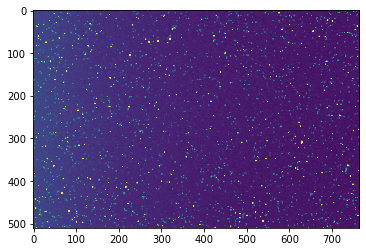

In [20]:
pl.imshow(longest_dark_image_timeseries[0],
          norm=simple_norm(longest_dark_image_timeseries[0], min_percent=1, max_percent=99.5))

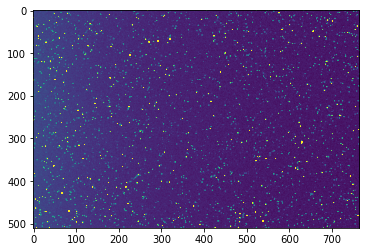

In [21]:
pl.imshow(longest_dark_image_timeseries[1],
          norm=simple_norm(longest_dark_image_timeseries[1], min_percent=1, max_percent=99.5))

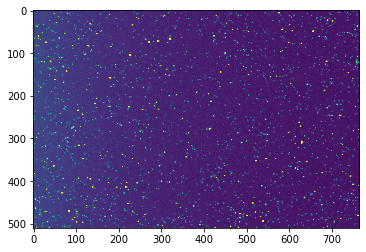

In [22]:
pl.imshow(longest_dark_image_timeseries[2], norm=simple_norm(longest_dark_image_timeseries[2], min_percent=1, max_percent=99.5))

5. Subtract the _mean bias_ from your dark images.  This is your first step in data reduction and should be familiar.

In [23]:
longest_dark_image_timeseries_biassubtracted = longest_dark_image_timeseries - mean_bias

6. Show each of the three `longest_dark_timeseries_biassubtracted` images.  Use an appropriate scaling.

In [24]:
# imshow commands, figure commands here (use new cells if needed)

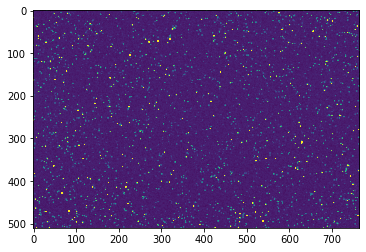

In [25]:
pl.imshow(longest_dark_image_timeseries_biassubtracted[0],
          norm=simple_norm(longest_dark_image_timeseries_biassubtracted[0], min_percent=1, max_percent=99.5))

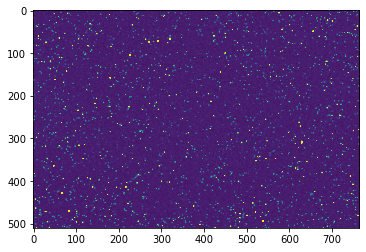

In [26]:
pl.imshow(longest_dark_image_timeseries_biassubtracted[1],
          norm=simple_norm(longest_dark_image_timeseries_biassubtracted[1], min_percent=1, max_percent=99.5))

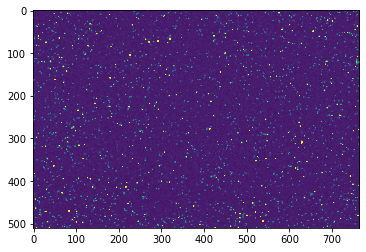

In [27]:
pl.imshow(longest_dark_image_timeseries_biassubtracted[2],
          norm=simple_norm(longest_dark_image_timeseries_biassubtracted[2], min_percent=1, max_percent=99.5))

Comment on the images.  Are there hot pixels?  Did subtracting the bias get rid of the hot pixels?

Yes, there are hot pixels, and no, bias subtraction didn't get rid of them!

7. Calculated both the _mean_ and the _median_ of the `longest_dark_timeseries_biassubtracted` images and show them

In [28]:
mean_long_dark = np.mean(longest_dark_image_timeseries_biassubtracted, axis=0)# you can use np.mean(data, axis=0) or data.mean(axis=0)
median_long_dark = np.median(longest_dark_image_timeseries_biassubtracted, axis=0)# you must use np.median(data, axis=0)

In [29]:
# imshow commands, figure commands here (use new cells if needed)

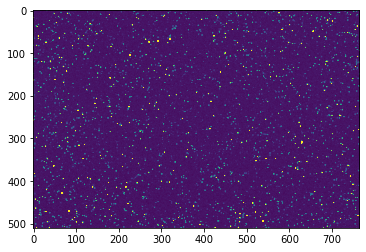

In [30]:
pl.imshow(mean_long_dark,
          norm=simple_norm(mean_long_dark, min_percent=1, max_percent=99.5))

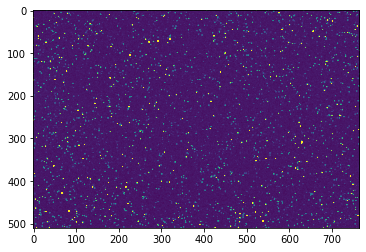

In [31]:
pl.imshow(median_long_dark,
          norm=simple_norm(median_long_dark, min_percent=1, max_percent=99.5))

Comment on those images.  Which one looks better?  Can you tell?

Can't really tell =(

8. Subtract the _mean_ (i.e., `mean_long_dark`) from the first of your dark images, then show it.  Do the same for the _median_ (`median_long_dark`).

In [32]:
d0mn = longest_dark_image_timeseries_biassubtracted[0] - mean_long_dark
d0med = longest_dark_image_timeseries_biassubtracted[0] - median_long_dark

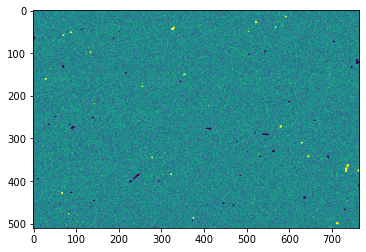

In [33]:
pl.imshow(d0mn,
          norm=simple_norm(d0mn, min_percent=1, max_percent=99.5))

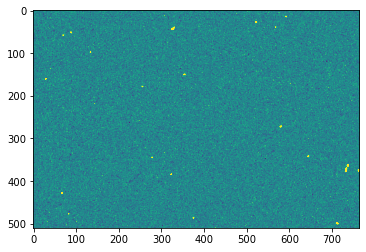

In [34]:
pl.imshow(d0med,
          norm=simple_norm(d0med, min_percent=1, max_percent=99.5))

Again, comment on the above images.  Which looks better?   What do you see in each?

9. Subtract the _median_ from each of the individual dark images.  Show them.

In [35]:
dark1_medsub = longest_dark_image_timeseries_biassubtracted[0] - median_long_dark# "medsub" is short for "median-subtracted"
dark2_medsub = longest_dark_image_timeseries_biassubtracted[1] - median_long_dark
dark3_medsub = longest_dark_image_timeseries_biassubtracted[2] - median_long_dark

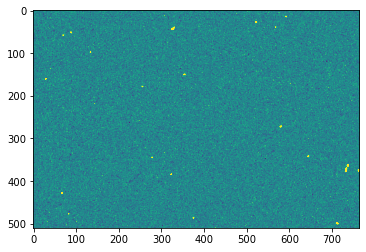

In [36]:
pl.imshow(dark1_medsub,
          norm=simple_norm(dark1_medsub, min_percent=1, max_percent=99.5))

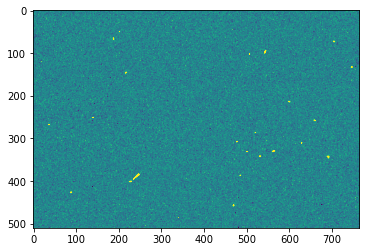

In [37]:
pl.imshow(dark2_medsub,
          norm=simple_norm(dark2_medsub, min_percent=1, max_percent=99.5))

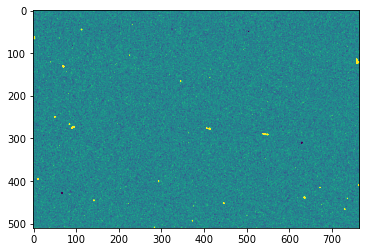

In [38]:
pl.imshow(dark3_medsub,
          norm=simple_norm(dark3_medsub, min_percent=1, max_percent=99.5))

You should see some "leftovers" in the above images.  They might look like stars.  They are cosmic ray hits!

About how many are there?  Given your exposure time, how many cosmic ray hits do we expect per second (in the basement of Bryant)?

- your answer - 

## Mean vs Median

You've (hopefully) seen in the above that the _median_ does a good job of removing cosmic rays, while the _mean_ does not.  The median is a robust statistic - it works well in the presence of outliers.  We'll keep using it moving forward, and we'll discuss it more.

In [39]:
import dask

In [41]:
dask.array.array(longest_dark_image_timeseries_biassubtracted)

dask.array<array, shape=(3, 510, 765), dtype=float64, chunksize=(3, 510, 765), chunktype=numpy.ndarray>